### Recursive problem
Bellman equation in infinite time horizon is
$$V_{i}(W) = \max_{W'} u(W-W')+\beta V_{i+1}(W')$$

1. Guess $V_i(W)$
2. Plug $V_I$ into equation/operator to get new $V_{i+1}$
3. Check $||V_{i+1}-V_i||$
4. If $||V_{i+1}-V_i||\leq \epsilon$, done; If not, repeat 1 to 4

#### Excercise 5.9

In [367]:
import numpy as np
#Set a vetor of discretized cake sizes
W_lb = 1e-2
W_ub = 1.0
N = 100
W_vec = np.linspace(W_lb, W_ub, N)

#### Excecise 5.10

In [368]:
#set other paramterers (discount factor)
beta = 0.9
#choose a utility function u(c)=log(c)
def utility(c):
    util = np.log(c)
    return util

The policy function $W' = \psi_T(W) = 0$

The value function $V_T(W) = ln(W)$

In [109]:
# Initial guess for value function
V_init = utility(W_vec)
print(V_init)

[-4.60517019 -3.91202301 -3.5065579  -3.21887582 -2.99573227 -2.81341072
 -2.65926004 -2.52572864 -2.40794561 -2.30258509 -2.20727491 -2.12026354
 -2.04022083 -1.96611286 -1.89711998 -1.83258146 -1.77195684 -1.71479843
 -1.66073121 -1.60943791 -1.56064775 -1.51412773 -1.46967597 -1.42711636
 -1.38629436 -1.34707365 -1.30933332 -1.27296568 -1.23787436 -1.2039728
 -1.17118298 -1.13943428 -1.10866262 -1.07880966 -1.04982212 -1.02165125
 -0.99425227 -0.96758403 -0.94160854 -0.91629073 -0.89159812 -0.86750057
 -0.84397007 -0.82098055 -0.7985077  -0.77652879 -0.75502258 -0.73396918
 -0.71334989 -0.69314718 -0.67334455 -0.65392647 -0.63487827 -0.61618614
 -0.597837   -0.5798185  -0.56211892 -0.54472718 -0.52763274 -0.51082562
 -0.49429632 -0.4780358  -0.46203546 -0.4462871  -0.43078292 -0.41551544
 -0.40047757 -0.38566248 -0.37106368 -0.35667494 -0.34249031 -0.32850407
 -0.31471074 -0.30110509 -0.28768207 -0.27443685 -0.26136476 -0.24846136
 -0.23572233 -0.22314355 -0.21072103 -0.19845094 -0.

Text(0, 0.5, 'V')

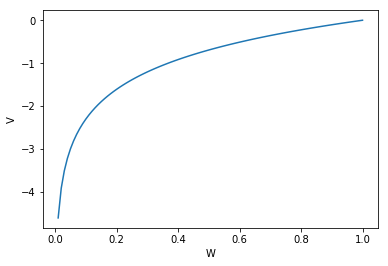

In [110]:
import matplotlib.pyplot as plt
plt.plot(W_vec, V_init)
plt.xlabel('W')
plt.ylabel('V')

#### Excercise 5.11

In [111]:
def dist(V_init, V_new):
    dist = ((V_new - V_init)**2).sum() #sum of squared errors
    return dist
delta = dist(V_init, np.zeros(N))
delta

178.92611065972804

#### Excercise 5.12

In [112]:
#Create utility matrix
c_mat = np.tile(W_vec.reshape((N,1)), (1,N)) - np.tile(W_vec.reshape((1,N)), (N,1))
c_pos = c_mat>0
c_mat[~c_pos] = 1e-7 #lower traingle matrix
u_mat = utility(c_mat)
V_prime = np.tile(V_init.reshape((1,N)), (N,1))
V_prime[~c_pos] = -9e+4
V_new = (u_mat + beta*V_prime).max(axis = 1) #maximizing along the row
delta = dist(V_init, V_new)
W_index = np.argmax(u_mat + beta*V_prime, axis=1)
W_prime = W_vec[W_index]
W_prime

array([0.01, 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04, 0.05, 0.05,
       0.06, 0.06, 0.07, 0.07, 0.08, 0.08, 0.09, 0.09, 0.09, 0.1 , 0.1 ,
       0.11, 0.11, 0.12, 0.12, 0.13, 0.13, 0.14, 0.14, 0.15, 0.15, 0.16,
       0.16, 0.17, 0.17, 0.18, 0.18, 0.18, 0.19, 0.19, 0.2 , 0.2 , 0.21,
       0.21, 0.22, 0.22, 0.23, 0.23, 0.24, 0.24, 0.25, 0.25, 0.26, 0.26,
       0.27, 0.27, 0.27, 0.28, 0.28, 0.29, 0.29, 0.3 , 0.3 , 0.31, 0.31,
       0.32, 0.32, 0.33, 0.33, 0.34, 0.34, 0.35, 0.35, 0.36, 0.36, 0.36,
       0.37, 0.37, 0.38, 0.38, 0.39, 0.39, 0.4 , 0.4 , 0.41, 0.41, 0.42,
       0.42, 0.43, 0.43, 0.44, 0.44, 0.45, 0.45, 0.45, 0.46, 0.46, 0.47,
       0.47])

In [113]:
delta = dist(V_init, V_new)
delta

6562865744.5285635

#### Excercise 5.13

In [114]:
V_init = V_new
V_prime = np.tile(V_init.reshape((1,N)), (N,1))
V_prime[~c_pos] = -9e+4
V_new = (u_mat + beta*V_prime).max(axis = 1) #maximizing along the row
delta = dist(V_init, V_new)
W_index = np.argmax(u_mat + beta*V_prime, axis=1)
W_prime = W_vec[W_index]
delta = dist(V_init, V_new)
delta

5315921432.356884

#### Excercise 5.14

In [115]:
#set parameters
maxiters = 500
toler = 1e-9
delta = 10.0
VF_iter = 0

In [116]:
while delta>toler and VF_iter<maxiters:
    VF_iter += 1
    #One contraction mapping
    V_prime = np.tile(V_init.reshape((1,N)), (N,1))
    V_prime[~c_pos] = -9e+4
    V_new = (u_mat + beta*V_prime).max(axis = 1) #maximizing along the row
    delta = dist(V_init, V_new)
    W_index = np.argmax(u_mat + beta*V_prime, axis=1)
    W_prime = W_vec[W_index]
    print('Iter=', VF_iter, ', distance =', delta)
    V_init = V_new
print("Congrats!")
print('V(W)', V_init)

Iter= 1 , distance = 5315921432.356884
Iter= 2 , distance = 4305896471.418966
Iter= 3 , distance = 3487776216.5675955
Iter= 4 , distance = 2825098788.019544
Iter= 5 , distance = 2288330056.357764
Iter= 6 , distance = 1853547373.8090138
Iter= 7 , distance = 1501373394.0455368
Iter= 8 , distance = 1216112465.4304204
Iter= 9 , distance = 985051109.6286845
Iter= 10 , distance = 797891408.7166361
Iter= 11 , distance = 646292049.0098146
Iter= 12 , distance = 523496566.09326845
Iter= 13 , distance = 424032223.8060949
Iter= 14 , distance = 343466105.6810028
Iter= 15 , distance = 278207549.28964245
Iter= 16 , distance = 225348118.14783967
Iter= 17 , distance = 182531978.5237014
Iter= 18 , distance = 147850905.07819986
Iter= 19 , distance = 119759235.2952075
Iter= 20 , distance = 97004982.62446027
Iter= 21 , distance = 78574037.84896688
Iter= 22 , distance = 63644972.47794887
Iter= 23 , distance = 51552429.430967025
Iter= 24 , distance = 41757469.47440472
Iter= 25 , distance = 33823551.827785835

#### Excercise 5.15

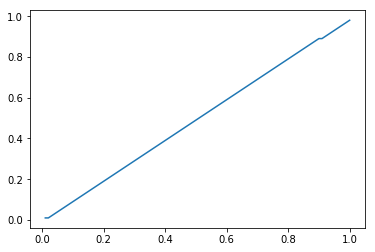

In [117]:
plt.plot(W_vec, W_prime)

### Stochastic process
$$V ( W , \varepsilon ) = \max _ { W ^ { \prime } \in [ 0 , W ] } \varepsilon u \left( W - W ^ { \prime } \right) + \beta E _ { \varepsilon ^ { \prime } } \left[ V \left( W ^ { \prime } , \varepsilon ^ { \prime } \right) \right] \quad \text { where } \quad \varepsilon \sim \mathrm { N } \left( \mu , \sigma ^ { 2 } \right)$$

#### Excercise 5.16

In [376]:
sigma = 0.05
M = 7
mu = 4*sigma
e_ub = mu+3*sigma
e_lb = mu-3*sigma
epsilon = np.linspace(e_lb, e_ub, M)
epsilon

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35])

In [370]:
import scipy.stats as sp
f = lambda x: sp.norm(loc=mu, scale=sigma).pdf(x)
gamma = f(epsilon)
gamma

array([0.08863697, 1.07981933, 4.83941449, 7.97884561, 4.83941449,
       1.07981933, 0.08863697])

#### Excercise 5.17

In [509]:
#Set a vetor of discretized cake sizes
W_lb = 1e-2
W_ub = 1.0
N = 100
W_vec = np.linspace(W_lb, W_ub, N)

#epsilon * u(W-W')
c_mat = np.tile(W_vec.reshape((N,1)), (1,N)) - np.tile(W_vec.reshape((1,N)), (N,1))
c_pos = c_mat>0
c_mat[~c_pos] = 1e-7 #lower traingle matrix
u_mat = utility(c_mat)
eu_cube = np.array([u_mat*e for e in epsilon])#(M,N,N) 3D array

In [510]:
#value function of entering T+1 with W'
V_init = np.zeros((N,M))
#V_init[~c_pos] = -9e+4
EV_prime = V_init @ gamma.reshape((M,1)) #(W', 1)
EV_prime_mat = np.tile(EV_prime.reshape((1,N)), (N,1))
EV_prime_mat[~c_pos] = -9e+4
EV_prime_cube = np.array([EV_prime_mat for e in range(M)])

In [511]:
V_new_cube = eu_cube + beta*EV_prime_cube
V_new = np.zeros((N,M))
W_new = np.zeros((N,M))
for i in range(N):
    sheet = V_new_cube[:, i, :]
    V_new[i] = sheet.max(axis=1)
    W_index = np.argmax(sheet, axis=1)
    W_new[i] = W_vec[W_index]

#### Excercise 5.18

In [512]:
def dist(V_init, V_new):
    dist = np.sum((V_init-V_new)**2)
    return dist
dist(V_init, V_new)

45930655737.64533

#### Excercise 5.19

In [513]:
V_init = V_new
#V_init[~c_pos] = -9e+4
EV_prime = V_init @ gamma.reshape((M,1)) #(W', 1)
EV_prime_mat = np.tile(EV_prime.reshape((1,N)), (N,1))
EV_prime_mat[~c_pos] = -9e+4
EV_prime_cube = np.array([EV_prime_mat for e in range(M)])
V_new_cube = eu_cube + beta*EV_prime_cube
V_new = np.zeros((N,M))
W_new = np.zeros((N,M))
for i in range(N):
    sheet = V_new_cube[:, i, :]
    V_new[i] = sheet.max(axis=1)
    W_index = np.argmax(sheet, axis=1)
    W_new[i] = W_vec[W_index]

In [514]:
print(dist(V_init, V_new))

45929630360.5779


#### Excercise 5.20

In [515]:
V_init = V_new
#V_init[~c_pos] = -9e+4
EV_prime = V_init @ gamma.reshape((M,1)) #(W', 1)
EV_prime_mat = np.tile(EV_prime.reshape((1,N)), (N,1))
EV_prime_mat[~c_pos] = -9e+4
EV_prime_cube = np.array([EV_prime_mat for e in range(M)])
V_new_cube = eu_cube + beta*EV_prime_cube
V_new = np.zeros((N,M))
W_new = np.zeros((N,M))
for i in range(N):
    sheet = V_new_cube[:, i, :]
    V_new[i] = sheet.max(axis=1)
    W_index = np.argmax(sheet, axis=1)
    W_new[i] = W_vec[W_index]
print(dist(V_init, V_new))

45917033863.3907


#### Excercise 5.21

In [516]:
maxiters = 500
toler = 1e-9
delta = 10.0
VF_iter = 0
V_init = np.zeros((N,M))

while delta>toler and VF_iter<maxiters:
    VF_iter += 1
    EV_prime = V_init @ gamma.reshape((M,1)) #(W', 1)
    EV_prime_mat = np.tile(EV_prime, (1,N))
    EV_prime_mat[~c_pos] = -9e+4
    EV_prime_cube = np.array([EV_prime_mat for e in range(M)])
    V_new_cube = eu_cube + beta*EV_prime_cube
    V_new = np.zeros((N,M))
    W_new = np.zeros((N,M))
    for i in range(N):
        sheet = V_new_cube[:, i, :]
        V_new[i] = sheet.max(axis=1)
        W_index = np.argmax(sheet, axis=1)
        W_new[i] = W_vec[W_index]
    delta = dist(V_init, V_new)
    print('Iter=', VF_iter, ', distance= ', delta)
    V_init = V_new

W_new

Iter= 1 , distance=  45930655737.64533
Iter= 2 , distance=  16223.39177231219
Iter= 3 , distance=  5253534.138986076
Iter= 4 , distance=  1701223846.211698
Iter= 5 , distance=  518813656513.11426
Iter= 6 , distance=  2186621133313.083
Iter= 7 , distance=  263770458241.28726
Iter= 8 , distance=  533625542.1073733
Iter= 9 , distance=  0.0


array([[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
       [0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
       [0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06],
       [0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07],
       [0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08],
       [0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09],
       [0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ],
       [0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11],
       [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12],
       [0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13],
       [0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14],
       [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15],
       [0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16],
       [0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17],
       [0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18],
       [0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19],
       [0.2 , 0.2 , 0.2 , 0.2 ,

#### Excercise 5.22

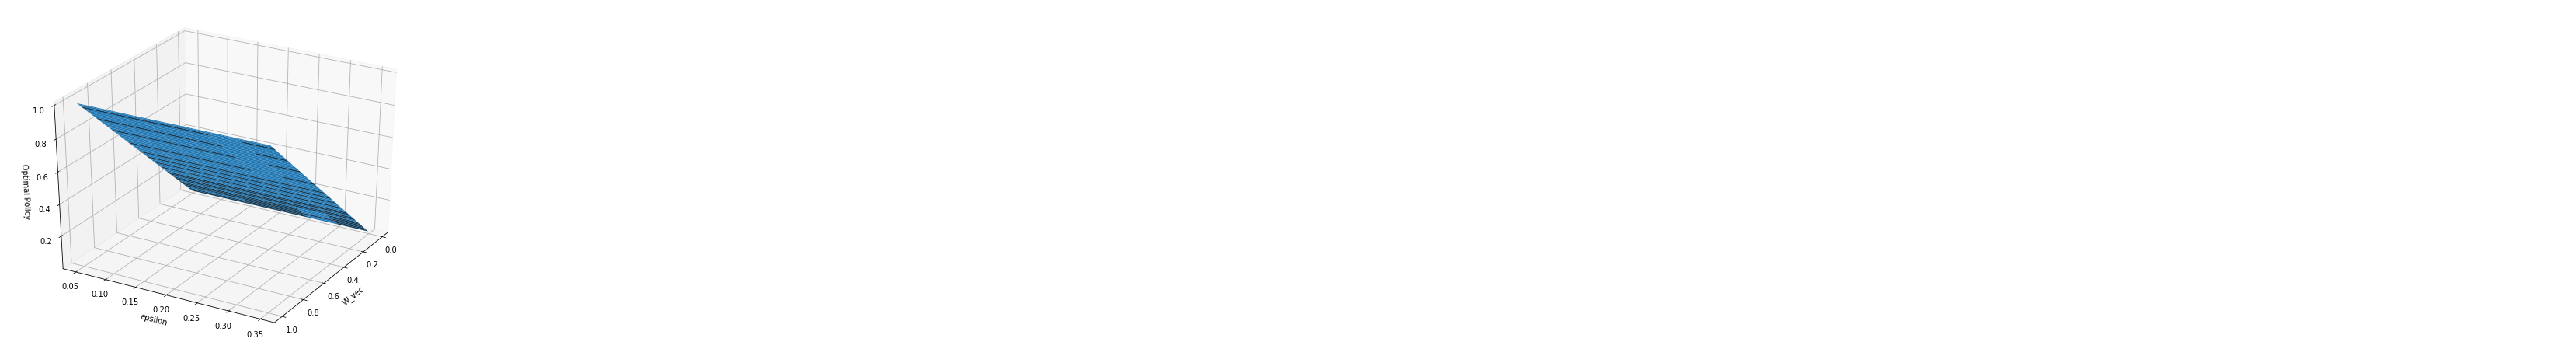

In [533]:
from mpl_toolkits import mplot3d
X, Y = np.meshgrid(W_vec, epsilon)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X.T, Y.T, W_new)
ax.set_xlabel('W_vec')
ax.set_ylabel('epsilon')
ax.set_zlabel('Optimal Policy')
ax.view_init(elev=30,azim=30)
plt.show()